**Heart disease prediction using Machine laerning**

importing all the necessary libraries required for our project

In [1]:
from ast import increment_lineno
#importing all the necessary libraries required for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




**Data** **preparation**

In [3]:
df=pd.read_csv('/content/HeartDisease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data** **exploration**

Text(0.5, 1.0, 'histogram of patient has heart disease')

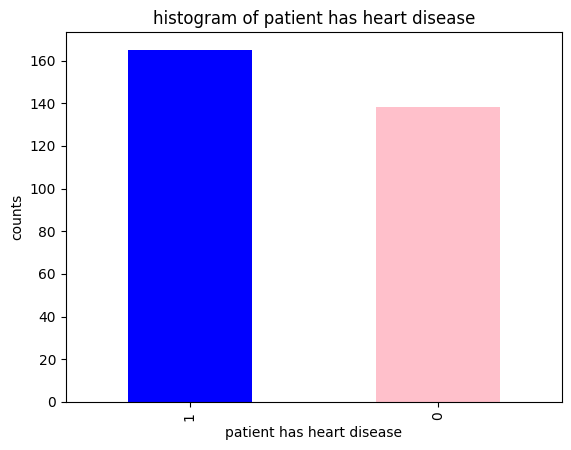

In [11]:
df.target.value_counts().plot(kind ="bar", color=["blue","pink"])
plt.xlabel('patient has heart disease')
plt.ylabel('counts')
plt.title('histogram of patient has heart disease')

In [12]:
#checking whether there any null values  or not
df.isna().sum()


age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [23]:
categorical_val=[]
continuous_val=[]
for column in df.columns:
    print('====================================================')
    print(f"{column}:df[column].unique()")
    if len(df[column].unique())<=10:
        categorical_val.append(column)
    else:
      continuous_val.append(column)


age:df[column].unique()
gender:df[column].unique()
chest_pain:df[column].unique()
rest_bps:df[column].unique()
cholestrol:df[column].unique()
fasting_blood_sugar:df[column].unique()
rest_ecg:df[column].unique()
thalach:df[column].unique()
exer_angina:df[column].unique()
old_peak:df[column].unique()
slope:df[column].unique()
ca:df[column].unique()
thalassemia:df[column].unique()
target:df[column].unique()


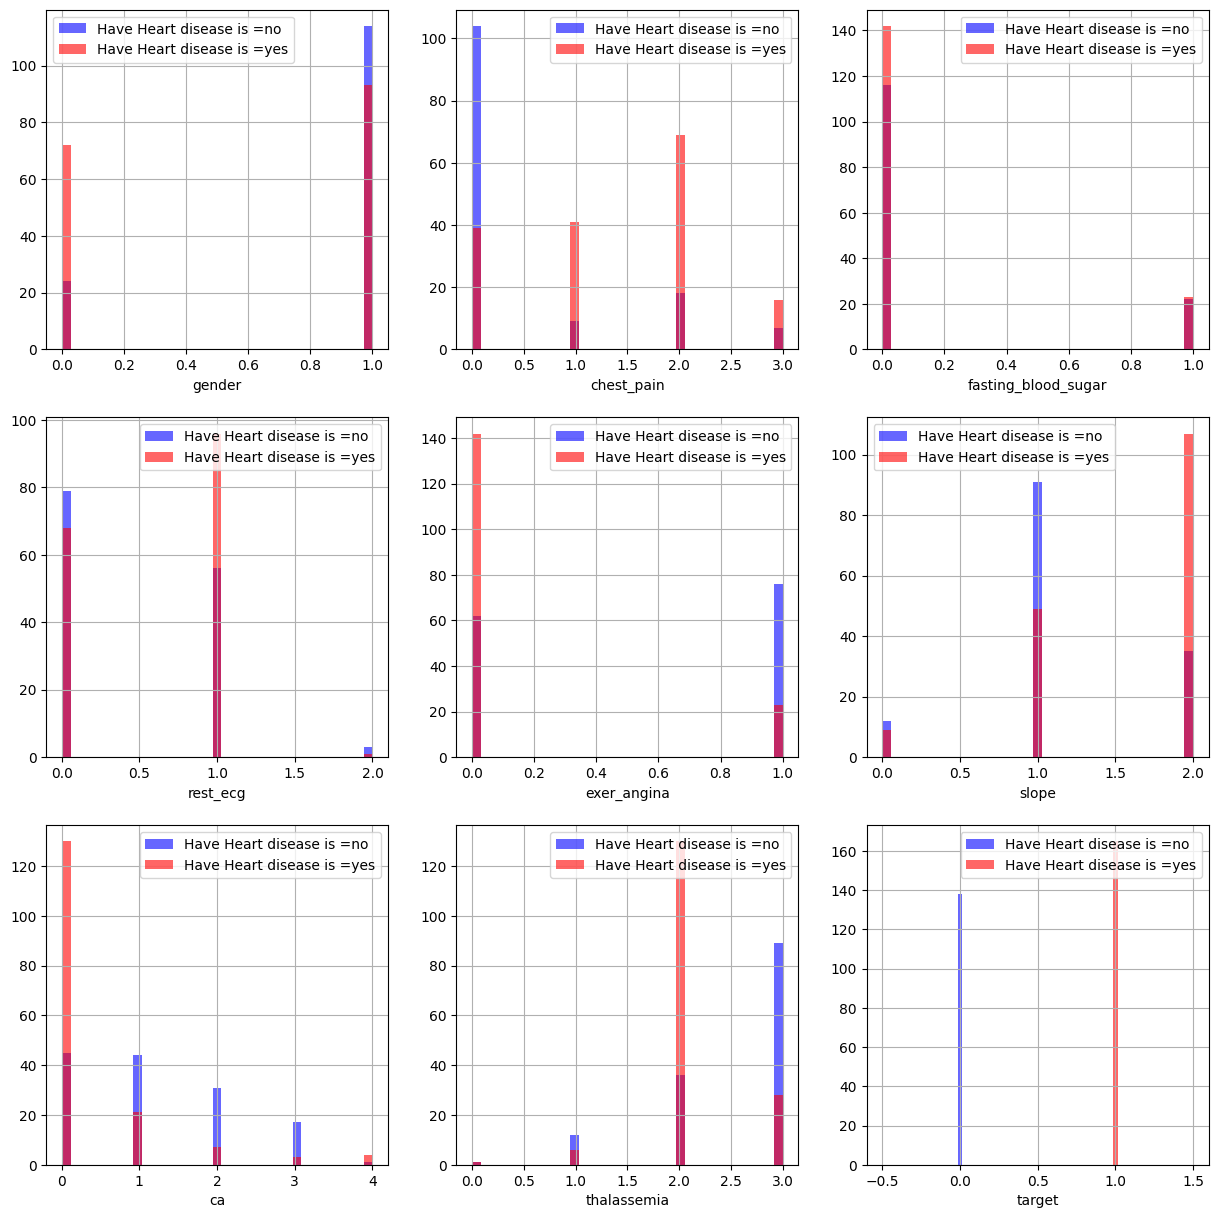

In [28]:
plt.figure(figsize=(15,15))

for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    df[df["target"]==0][column].hist(bins=35,color='blue', label='Have Heart disease is =no',alpha=0.6)
    df[df["target"]==1][column].hist(bins=35,color='red', label='Have Heart disease is =yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)


(14.5, 0.5)

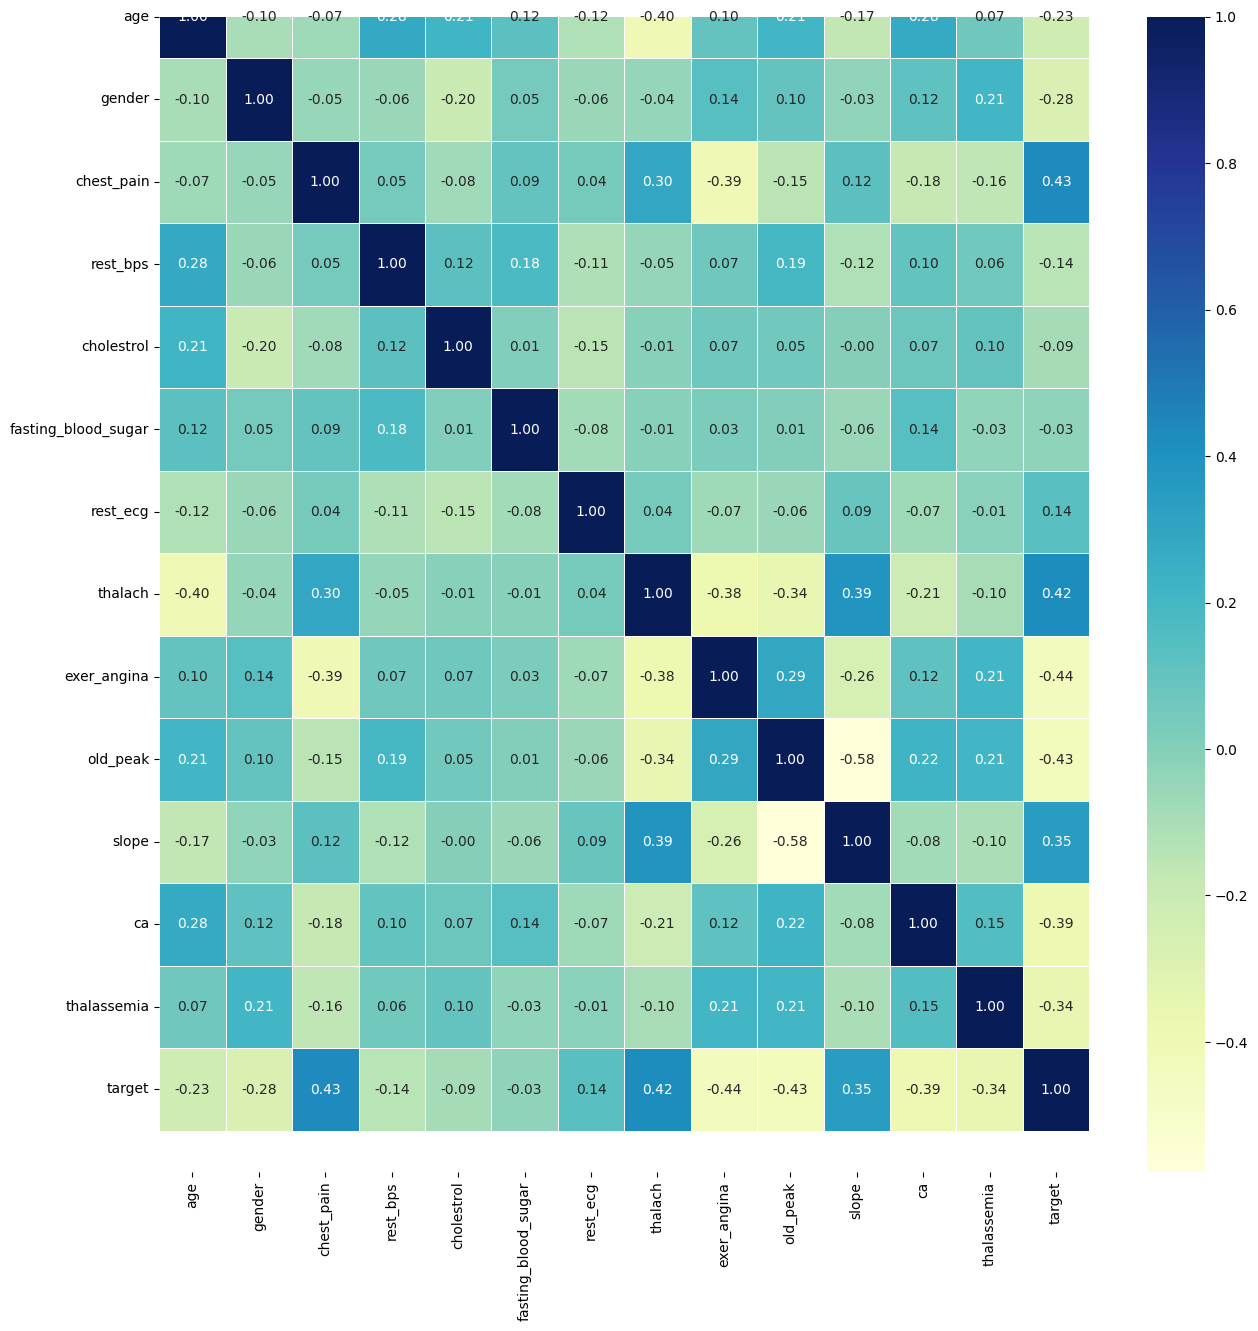

In [32]:
#let's make our correlation matrix little more prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt='.2f',cmap='YlGnBu');
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top=0.5)


<Axes: title={'center': 'correlation with target'}>

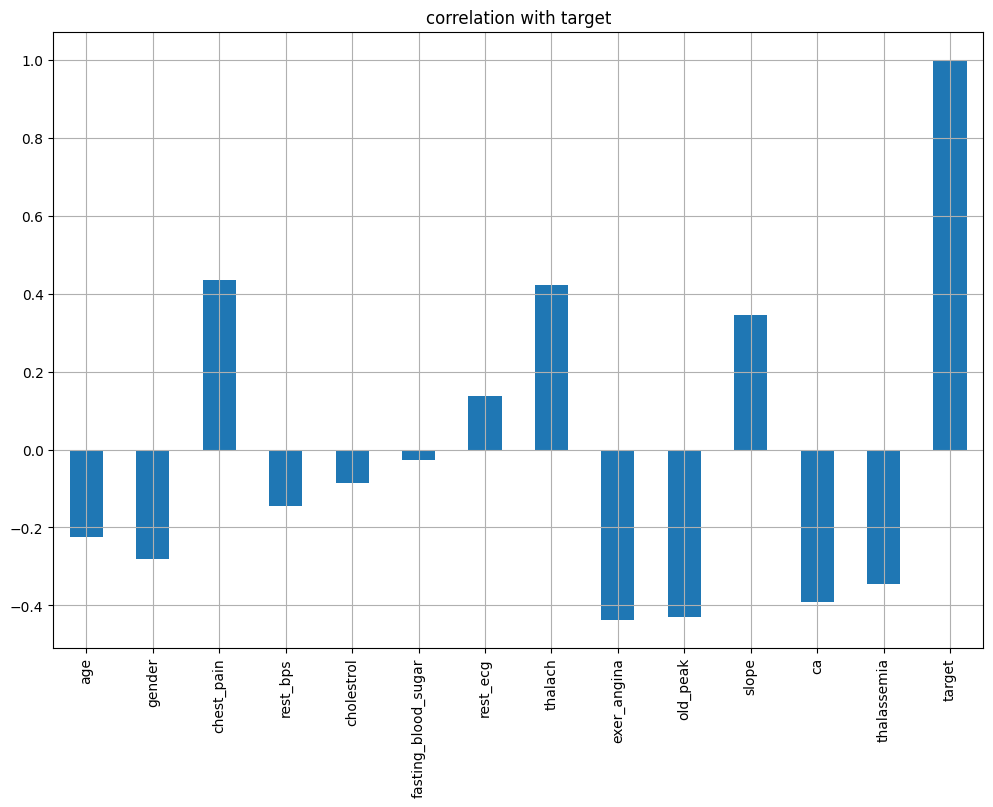

In [36]:
df.corrwith(df.target).plot(kind='bar',grid=True,figsize=(12,8),title='correlation with target')

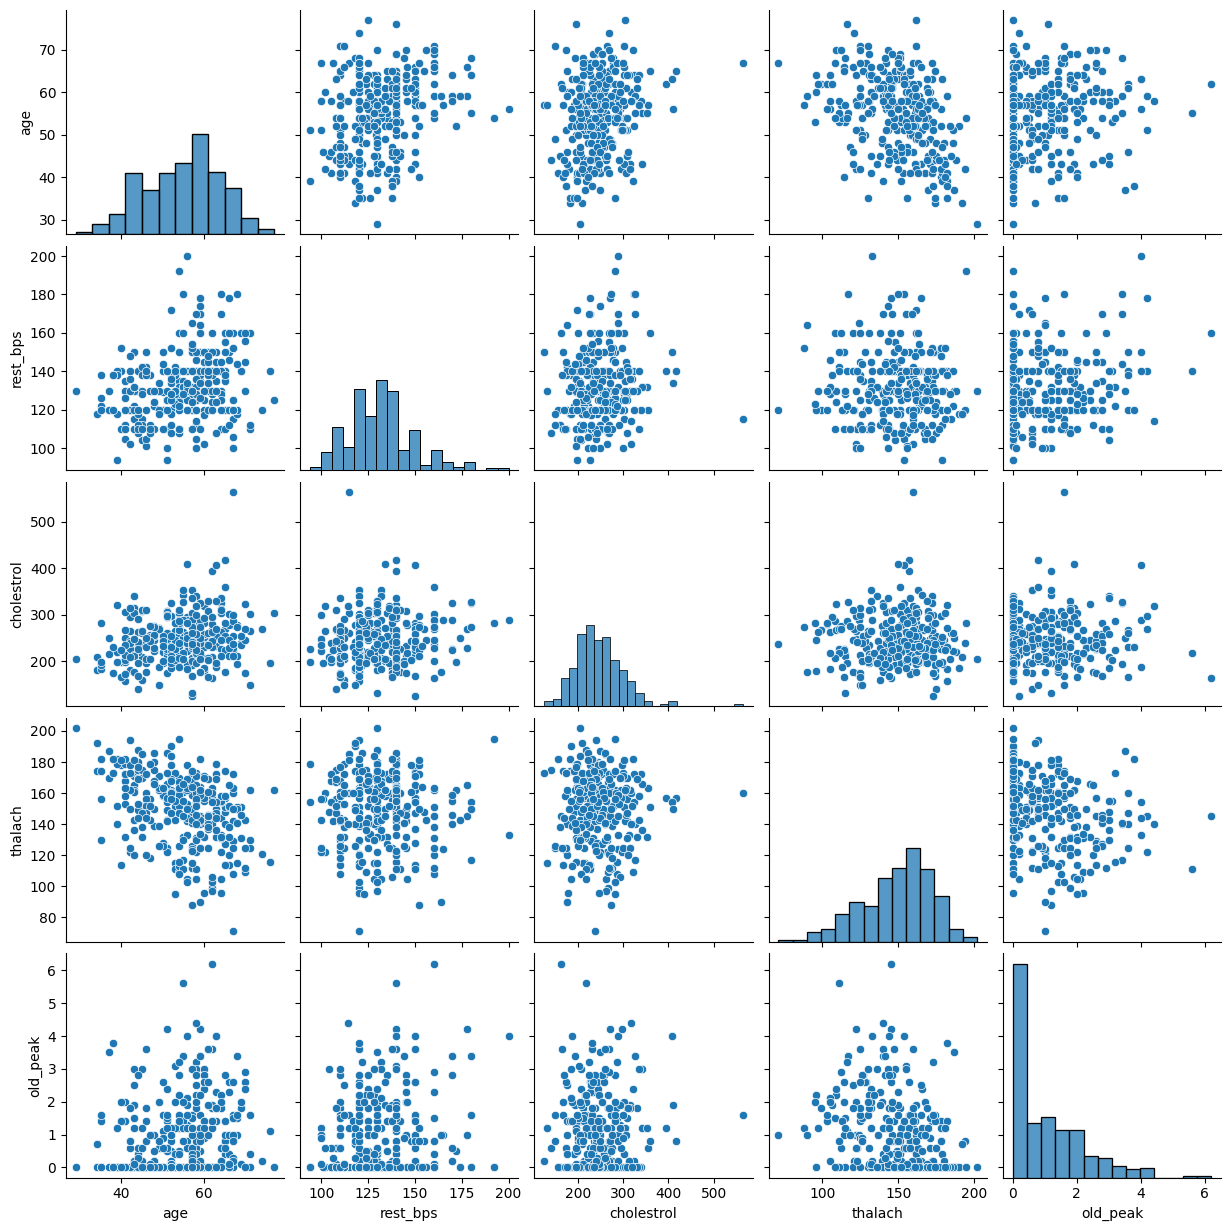

In [39]:
null_val= df[['age','rest_bps','cholestrol','thalach','old_peak']]
sns.pairplot(null_val)

**data preprocessing**

In [42]:
target_var=df['target']
independent_features= df.drop(columns=['target'])


In [44]:
df=pd.get_dummies(independent_features,columns=['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','thalassemia'])

In [45]:
df.head()

,age,rest_bps,cholestrol,thalach,old_peak,slope,ca,gender_0,gender_1,chest_pain_0,...,fasting_blood_sugar_1,rest_ecg_0,rest_ecg_1,rest_ecg_2,exer_angina_0,exer_angina_1,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,0,0,False,True,False,...,True,True,False,False,True,False,False,True,False,False
1,37,130,250,187,3.5,0,0,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,41,130,204,172,1.4,2,0,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,56,120,236,178,0.8,2,0,False,True,False,...,False,False,True,False,True,False,False,False,True,False
4,57,120,354,163,0.6,2,0,True,False,True,...,False,False,True,False,False,True,False,False,True,False


In [46]:
df.tail()

,age,rest_bps,cholestrol,thalach,old_peak,slope,ca,gender_0,gender_1,chest_pain_0,...,fasting_blood_sugar_1,rest_ecg_0,rest_ecg_1,rest_ecg_2,exer_angina_0,exer_angina_1,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
298,57,140,241,123,0.2,1,0,True,False,True,...,False,False,True,False,False,True,False,False,False,True
299,45,110,264,132,1.2,1,0,False,True,False,...,False,False,True,False,True,False,False,False,False,True
300,68,144,193,141,3.4,1,2,False,True,True,...,True,False,True,False,True,False,False,False,False,True
301,57,130,131,115,1.2,1,1,False,True,True,...,False,False,True,False,False,True,False,False,False,True
302,57,130,236,174,0.0,1,1,True,False,False,...,False,True,False,False,True,False,False,False,True,False


**Data transformation**

In [52]:
sc=StandardScaler()
col_to_scale= ['age','rest_bps','cholestrol','thalach','old_peak']
df[col_to_scale] = sc.fit_transform(df[col_to_scale])

In [54]:
df.head()

,age,rest_bps,cholestrol,thalach,old_peak,slope,ca,gender_0,gender_1,chest_pain_0,...,fasting_blood_sugar_1,rest_ecg_0,rest_ecg_1,rest_ecg_2,exer_angina_0,exer_angina_1,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,0,False,True,False,...,True,True,False,False,True,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,0,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,2,0,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,2,0,False,True,False,...,False,False,True,False,True,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,2,0,True,False,True,...,False,False,True,False,False,True,False,False,True,False


**Model Training and  Train Test split**

In [56]:
x=df
y=target_var
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("Train Result:\n==========================================")
        print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
        print("----------------------------------------------")
        print(f"Classification Report; \n{clf_report}")
        print("----------------------------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train,pred)}\n")

    elif train==False:
        pred=clf.predict(x_test)
        clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("Test Result:\n=========================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f} %")
        print("----------------------------------------------")
        print(f"Classification Report: \n{clf_report}")
        print("----------------------------------------------")
        print(f"Classification Matrix:\n{confusion_matrix(y_test,pred)}\n")



**Logistic regression**

In [58]:
lr_clf= LogisticRegression(solver='liblinear')
lr_clf.fit(x_train,y_train)

print_score(lr_clf,x_train,x_test,y_train,y_test,train=True)
print_score(lr_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 85.54%
----------------------------------------------
Classification Report; 
                    0           1  accuracy   macro avg  weighted avg
precision    0.877551    0.840278  0.855372    0.858914      0.857066
recall       0.788991    0.909774  0.855372    0.849383      0.855372
f1-score     0.830918    0.873646  0.855372    0.852282      0.854401
support    109.000000  133.000000  0.855372  242.000000    242.000000
----------------------------------------------
Confusion Matrix: 
 [[ 86  23]
 [ 12 121]]

Test Result:
Accuracy Score: 90.16 %
----------------------------------------------
Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.870968   0.933333  0.901639   0.902151      0.903684
recall      0.931034   0.875000  0.901639   0.903017      0.901639
f1-score    0.900000   0.903226  0.901639   0.901613      0.901692
support    29.000000  32.000000  0.901639  61.000000     61.000000
--------

***Support  Vector Machine***

In [59]:
svc_clf=SVC()
svc_clf.fit(x_train,y_train)
print_score(svc_clf,x_train,x_test,y_train,y_test,train=True)
print_score(svc_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 90.91%
----------------------------------------------
Classification Report; 
                    0           1  accuracy   macro avg  weighted avg
precision    0.930693    0.893617  0.909091    0.912155      0.910317
recall       0.862385    0.947368  0.909091    0.904877      0.909091
f1-score     0.895238    0.919708  0.909091    0.907473      0.908686
support    109.000000  133.000000  0.909091  242.000000    242.000000
----------------------------------------------
Confusion Matrix: 
 [[ 94  15]
 [  7 126]]

Test Result:
Accuracy Score: 88.52 %
----------------------------------------------
Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.878788  0.885246   0.885823      0.885477
recall      0.862069   0.906250  0.885246   0.884159      0.885246
f1-score    0.877193   0.892308  0.885246   0.884750      0.885122
support    29.000000  32.000000  0.885246  61.000000     61.000000
--------

***Naive Bayes***

In [63]:
GaussianNB_clf= GaussianNB()
GaussianNB_clf.fit(x_train,y_train)
print_score(GaussianNB_clf,x_train,x_test,y_train,y_test,train=True)
print_score(GaussianNB_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 69.83%
----------------------------------------------
Classification Report; 
                    0           1  accuracy   macro avg  weighted avg
precision    0.608434    0.894737  0.698347    0.751585      0.765782
recall       0.926606    0.511278  0.698347    0.718942      0.698347
f1-score     0.734545    0.650718  0.698347    0.692632      0.688475
support    109.000000  133.000000  0.698347  242.000000    242.000000
----------------------------------------------
Confusion Matrix: 
 [[101   8]
 [ 65  68]]

Test Result:
Accuracy Score: 67.21 %
----------------------------------------------
Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.600000   0.875000  0.672131   0.737500      0.744262
recall      0.931034   0.437500  0.672131   0.684267      0.672131
f1-score    0.729730   0.583333  0.672131   0.656532      0.652932
support    29.000000  32.000000  0.672131  61.000000     61.000000
--------

***Decision Tree***

In [64]:
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
print_score(dt_clf,x_train,x_test,y_train,y_test,train=True)
print_score(dt_clf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 100.00%
----------------------------------------------
Classification Report; 
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
----------------------------------------------
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 80.33 %
----------------------------------------------
Classification Report: 
                   0          1  accuracy  macro avg  weighted avg
precision   0.774194   0.833333  0.803279   0.803763      0.805218
recall      0.827586   0.781250  0.803279   0.804418      0.803279
f1-score    0.800000   0.806452  0.803279   0.803226      0.803384
support    29.000000  32.000000  0.803279  61.000000     61.000000
----------------------------------------------
Classification 

***Random Forest Classifier***

In [66]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)
print_score(rf_clf,x_train,x_test,y_train,y_test,train=True)
print_score(rf_clf,x_train,x_test,y_train,y_test,train=False)



Train Result:
Accuracy Score: 100.00%
----------------------------------------------
Classification Report; 
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
----------------------------------------------
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 86.89 %
----------------------------------------------
Classification Report: 
                   0       1  accuracy  macro avg  weighted avg
precision   0.862069   0.875  0.868852   0.868534      0.868852
recall      0.862069   0.875  0.868852   0.868534      0.868852
f1-score    0.862069   0.875  0.868852   0.868534      0.868852
support    29.000000  32.000  0.868852  61.000000     61.000000
----------------------------------------------
Classification Matrix:
[[25  4

In [69]:
x_train.iloc[19]

age                     -1.805024
rest_bps                 0.364165
cholestrol              -1.377212
thalach                  1.021244
old_peak                -0.896862
slope                           2
ca                              4
gender_0                    False
gender_1                     True
chest_pain_0                False
chest_pain_1                False
chest_pain_2                 True
chest_pain_3                False
fasting_blood_sugar_0        True
fasting_blood_sugar_1       False
rest_ecg_0                  False
rest_ecg_1                   True
rest_ecg_2                  False
exer_angina_0                True
exer_angina_1               False
thalassemia_0               False
thalassemia_1               False
thalassemia_2                True
thalassemia_3               False
Name: 164, dtype: object

In [71]:
new_train=x_train.iloc[95]
a=np.asarray(new_train)
a=a.reshape(1,-1)
p=svc_clf.predict(a)
print(p)

[1]


In [73]:
if p[0]==1:
  print('The person  have Heart Disease')
else:
    print("Great!!! the person is normal")

The person  have Heart Disease


**Conclusion**

--> So, in this project we have used Machine Learning to predict whether a person is suffering from Heart disease or not.
--> steps which were involved along the project are..

--> 1. **Data Collection**

--> 2. **Data Preparation**:-
    importing necessary libraries like pandas,numpy,matplotlib,scikit-learn,and ***Exploratory Data analysis***

--> 3.**Data Exploration**:-
we have used some plots to get an understanding of what our data is telling to us like count of our target variable,Histogram is to check whether the variables are normally distributed or not .unique values present in a variable.

--> 4. **Data Preprocessing**:-
 Here we have checked whether there are any null values,outliers,unwanted values, missing values.Fortunately we didn't have any. So after that we have created a dummy variables using **pd.getdummies()** to tranform out categorical variables to numerical variables(0/1)

 --> 5. **Data Tranformation**:-
  This will help us to transform the  variables used to bring all the variables to the same scale using **StandardScaler**()

  --> 5. **Data Modelling**:-
   before modelling  we are splitting our data to **train_test_split(80,20)** after this I have taken  some  Machine algothims
   1. Logistic Regression
   2. support vector machine
   3. naive Bayes
   4. Decision Tree
   5. RandomForest classifier

I have tested with each and every model and i got ***90.91 accuracy*** in Support vector Classifier.
So, inconclusion our model predict a person has Heart disease.
  
